In [44]:
import numpy as np
from tensorflow import keras
import matplotlib.pylab as plt

In [45]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [46]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

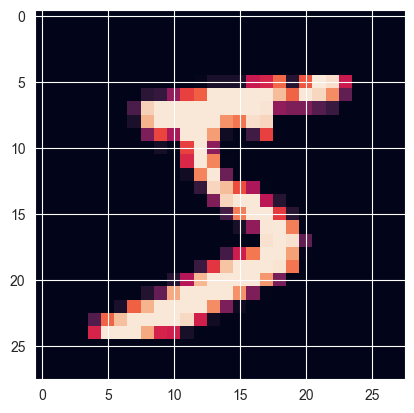

In [47]:
plt.imshow(x_train[0])

In [48]:
y_train[0]

np.uint8(5)

In [49]:
input_shape = (28,28,1)
num_classes = 10

In [50]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [51]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [52]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [53]:
print(x_test.shape[0],"test samples")

10000 test samples


In [54]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [55]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [56]:
from tensorflow.keras import layers
num_filters_1 = 32
num_filters_2 = 64
keras_size = (3,3)
model = keras.Sequential(
    [keras.Input(shape=input_shape),
     layers.Conv2D(num_filters_1, 
                   keras_size,
                   strides=1,
                   padding="valid", 
                   activation="relu",
                   use_bias=True,
                   bias_initializer=keras.initializers.Zeros()),
     layers.MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"),
     layers.Conv2D(num_filters_2, 
                   keras_size,
                   strides=1,
                   padding="valid", 
                   activation="relu"),
     layers.MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"),
     keras.layers.Flatten(),
     keras.layers.Dropout(rate=0.5),
     keras.layers.Dense(num_classes, activation="softmax")
    ])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [58]:
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7731 - loss: 0.7457 - val_accuracy: 0.9793 - val_loss: 0.0782
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9657 - loss: 0.1112 - val_accuracy: 0.9865 - val_loss: 0.0538
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9726 - loss: 0.0877 - val_accuracy: 0.9883 - val_loss: 0.0464
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9779 - loss: 0.0720 - val_accuracy: 0.9873 - val_loss: 0.0445
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9803 - loss: 0.0623 - val_accuracy: 0.9892 - val_loss: 0.0388
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9841 - loss: 0.0535 - val_accuracy: 0.9898 - val_loss: 0.0378
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9842 - loss: 0.0493 - val_accuracy: 0.9907 - val_loss: 0.0353
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9850 - loss: 0.0471 - val_accu

In [59]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print(score)

Test loss: 0.0262528657913208
Test accuracy: 0.9908000230789185
[0.0262528657913208, 0.9908000230789185]


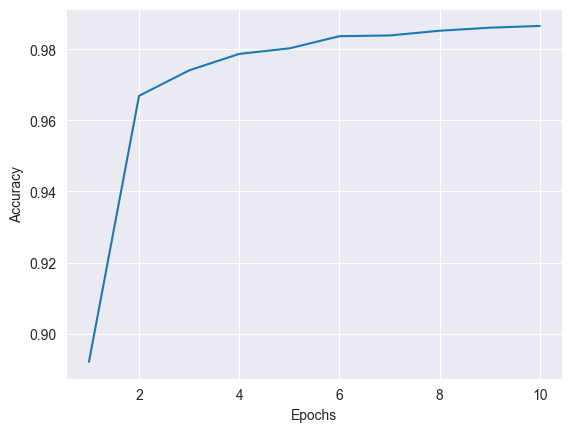

In [60]:
plt.plot(range(1,epochs+1),history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [61]:
prediction = model.predict(x_test[:1])
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[1.3645517e-09 1.9103698e-10 1.4071190e-06 1.0527100e-06 7.8877978e-14
  1.2663240e-10 5.1324648e-17 9.9999738e-01 2.1151696e-08 1.2793983e-07]]


In [62]:
list(prediction[0]).index(prediction[0].max())

7